In [1]:
import numpy as np
import pandas as pd
import random as random

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix

import numpy as np
import numpy.random as r

import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
train_df = pd.read_csv("fashion-mnist_train.csv")
test_df = pd.read_csv("fashion-mnist_test.csv")

train_data =  np.array(train_df)
test_data =  np.array(test_df)

X_train = np.array(train_data[:,1:])
y_train = np.array(train_data[:,0])
X_test = np.array(test_data[:,1:])
y_test = np.array(test_data[:,0]) 

X_scale = StandardScaler()
X = np.concatenate((X_train, X_test), axis=0)
X_new = X_scale.fit_transform(X)

X_train = X_new[ : 60000, : ]
X_test = X_new[60000: , :]

X_train_not_used, X_train, y_train_not_used, y_train = train_test_split(X_train, y_train, test_size=1200, random_state=10, shuffle=True)
X_test_not_used, X_test, y_test_not_used, y_test = train_test_split(X_test, y_test, test_size=1000, random_state=10, shuffle=True)

In [3]:
def convert_y_to_vect(y):
    y_vect = np.zeros((len(y), 10))
    for i in range(len(y)):
        y_vect[i, y[i]] = 1
    return y_vect

In [4]:
y_v_train = convert_y_to_vect(y_train)
y_v_test = convert_y_to_vect(y_test)

In [5]:
def f(z):
    return 1 / (1 + np.exp(-z))
def f_deriv(z):
    return f(z) * (1 - f(z))

In [6]:
def setup_and_init_weights(nn_structure):
    W = {} 
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [7]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [8]:
def feed_forward(x, W, b):
    a = {1: x}
    z = { } 
    for l in range(1, len(W) + 1):
        node_in = a[l]
        z[l+1] = W[l].dot(node_in) + b[l]
        a[l+1] = f(z[l+1])
    return a, z

In [9]:
def calculate_out_layer_delta(y, a_out, z_out):
    return -(y-a_out) * f_deriv(z_out) 

def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [10]:
def train_nn(nn_structure, X, y, lamb, iter_num=1000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    N = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%1000 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(N):
            delta = {}
            a, z = feed_forward(X[i, :], W, b)
            for l in range(len(nn_structure), 0, -1):
                if l == len(nn_structure):
                    delta[l] = calculate_out_layer_delta(y[i,:], a[l], z[l])
                    avg_cost += np.linalg.norm((y[i,:]-a[l]))
                else:
                    if l > 1:
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l])
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(a[l][:,np.newaxis]))
                    tri_b[l] += delta[l+1]
        for l in range(len(nn_structure) - 1, 0, -1):
            W[l] += -alpha * (1.0/N * tri_W[l] + lamb * W[l])
            b[l] += -alpha * (1.0/N * tri_b[l])
        avg_cost = (1.0/N * avg_cost)
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

def predict_y(W, b, X, n_layers):
    N = X.shape[0]
    y = np.zeros((N,))
    for i in range(N):
        a, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(a[n_layers])
    return y

Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Lamda is: 0.0001
Train Prediction accuracy is 17.0%
Test Prediction accuracy is 17.0%


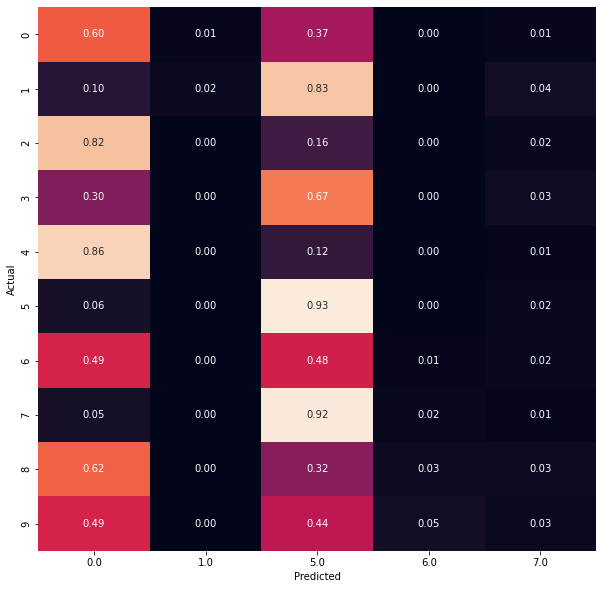

Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Lamda is: 0.001
Train Prediction accuracy is 17.333333333333336%
Test Prediction accuracy is 17.8%


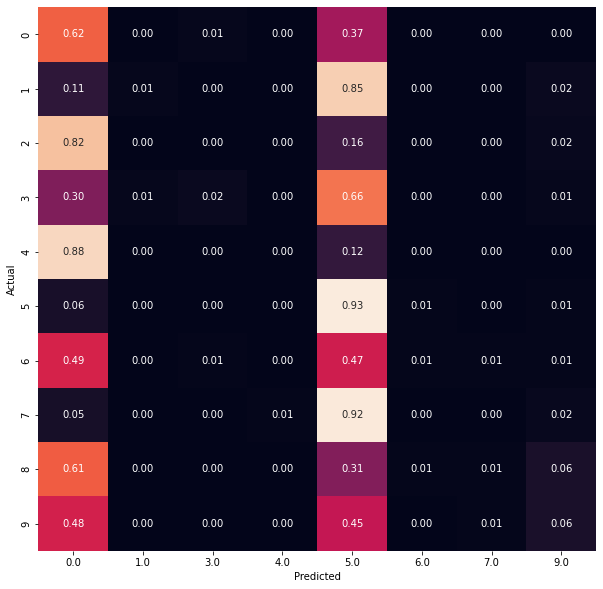

Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Lamda is: 0.01
Train Prediction accuracy is 17.333333333333336%
Test Prediction accuracy is 17.2%


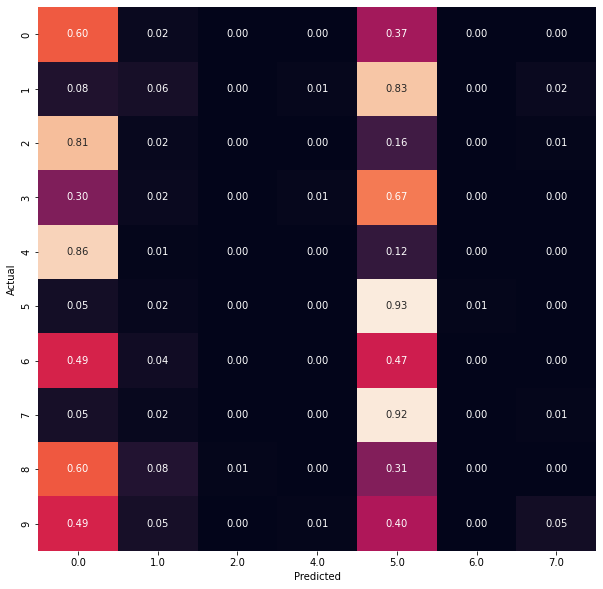

Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Lamda is: 0.1
Train Prediction accuracy is 17.166666666666668%
Test Prediction accuracy is 17.5%


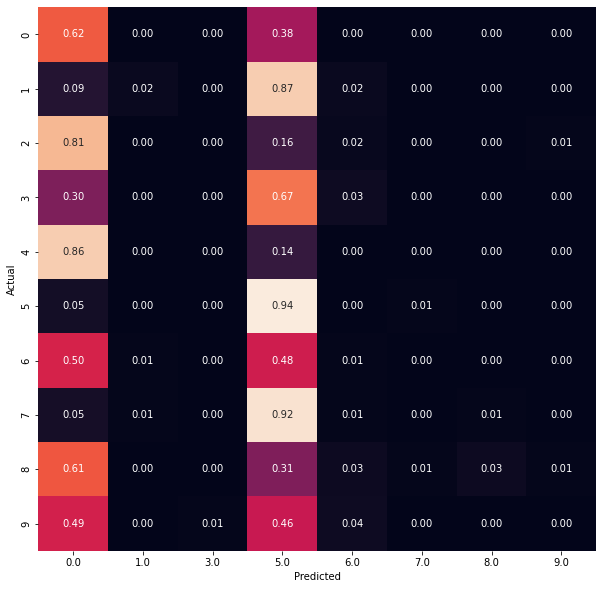

Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Lamda is: 1.0
Train Prediction accuracy is 17.083333333333332%
Test Prediction accuracy is 17.4%


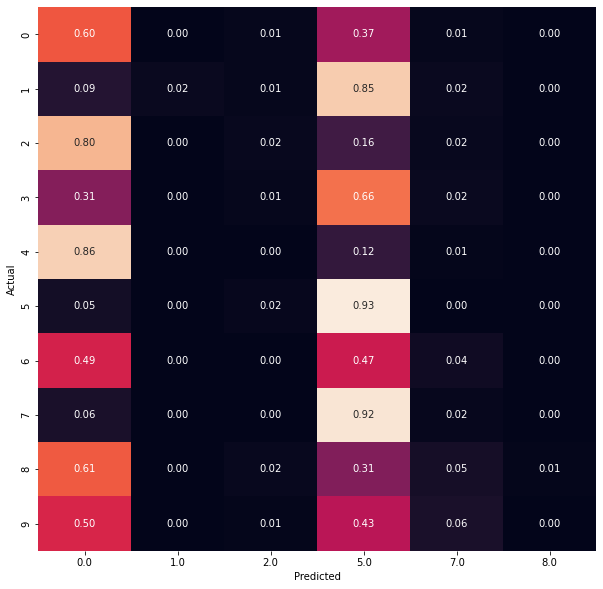

Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Lamda is: 10.0
Train Prediction accuracy is 12.25%
Test Prediction accuracy is 12.4%


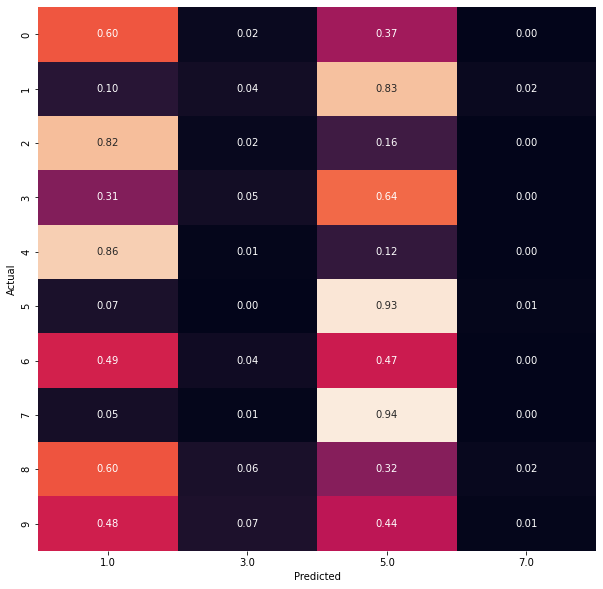

Starting gradient descent for 1000 iterations
Iteration 0 of 1000
Lamda is: 100.0
Train Prediction accuracy is 17.666666666666668%
Test Prediction accuracy is 17.1%


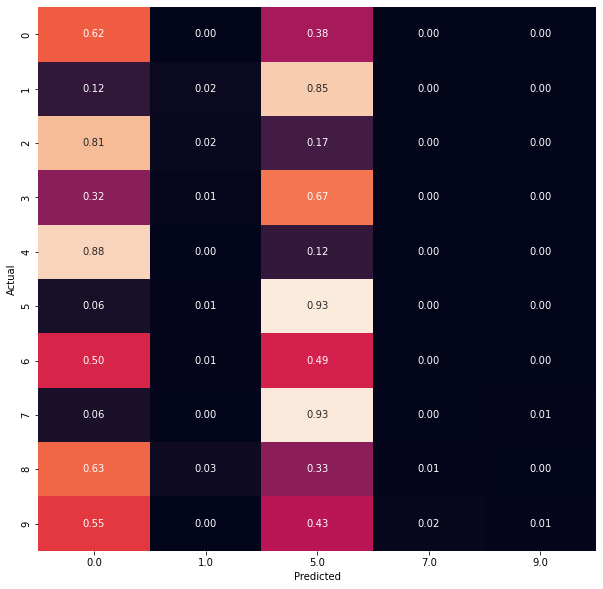

In [11]:
nn_structure = [784, 88, 10]
lamb = .0001
train_accuracies = []
test_accuracies = []
while lamb != 1000:
    
    W, b, avg_cost_func = train_nn(nn_structure, X_train, y_v_train,.0001)
    
    print('Lamda is:',lamb)
    
    y_pred = predict_y(W, b, X_train, 3)
    print('Train Prediction accuracy is {}%'.format(accuracy_score(y_train, y_pred) * 100))
    train_accuracies.append(accuracy_score(y_train, y_pred))
    
    y_pred = predict_y(W, b, X_test, 3)
    print('Test Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))
    test_accuracies.append(accuracy_score(y_test, y_pred))
    
    cm = pd.crosstab(y_test, y_pred,rownames=['Actual'], colnames=['Predicted'], normalize='index')
    p = plt.figure(figsize=(10,10))
    p = sns.heatmap(cm, annot=True, fmt=".2f", cbar=False)
    
    plt.show()
    lamb *= 10

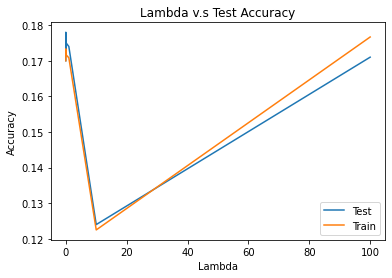

In [12]:
lv = [.0001, .001, .01, .1, 1, 10, 100]
plt.plot(lv, test_accuracies, label = "Test")
plt.plot(lv, train_accuracies, label = "Train")
plt.xlabel('Lambda')
plt.ylabel('Accuracy')
plt.title('Lambda v.s Test Accuracy')
plt.legend()
plt.show()